In [1]:
import numpy as np 
import sklearn.svm
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import sklearn
plt.ion()

 Importation de la Base de données

In [2]:
os.chdir('/Users/farah/Documents/INFO/Cours_ET4/MachineLearning/ProjetIA')
heartt = pd.read_csv('heart_failure_clinical_records_dataset.csv', sep=',', header=0)
heart = heartt.iloc[np.random.permutation(heartt.index)].reset_index(drop=True)
heart

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,58.0,1,200,1,60,0,300000.00,0.80,137,0,0,104,0
1,57.0,1,129,0,30,0,395000.00,1.00,140,0,0,42,1
2,55.0,1,180,0,45,0,263358.03,1.18,137,1,1,211,0
3,80.0,0,148,1,38,0,149000.00,1.90,144,1,1,23,1
4,60.0,0,253,0,35,0,279000.00,1.70,140,1,0,250,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,54.0,1,427,0,70,1,151000.00,9.00,137,0,0,196,1
295,68.0,1,220,0,35,1,289000.00,0.90,140,1,1,20,1
296,50.0,1,298,0,35,0,362000.00,0.90,140,1,1,240,0
297,72.0,1,328,0,30,1,621000.00,1.70,138,0,1,88,1


In [3]:
heartt.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

parameters = {'kernel':('rbf', 'linear'), 'C':[0.01, 0.1, 1, 10,100], 'gamma':[0.01, 0.1, 1, 10,100]}
#parameters2 = {'kernel':'linear', 'C':[0.01, 0.1, 1, 10,100], 'gamma':[0.01, 0.1, 1, 10,100]}
svc = svm.SVC()
clfff = GridSearchCV(svc, parameters, verbose=2)

In [5]:
features = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']

features2 = ['age', 'creatinine_phosphokinase',
       'ejection_fraction', 'platelets',
       'serum_creatinine', 'serum_sodium', 'time']

target = ['DEATH_EVENT']

['DEATH_EVENT']

Etablissement des matrices

In [7]:
X = np.asarray(features)
Y = np.asarray(target)
print("Le X est de dimension" , X.shape )
print("Le Y est de dimension" , Y.shape )

Le X est de dimension (12,)
Le Y est de dimension (1,)


In [8]:
A = heart.loc[:, features].values
A.shape
A2 = heart.loc[:, features2].values
A2.shape

(299, 7)

In [9]:
B = heart.loc[:, target].values

In [10]:
from sklearn.model_selection import train_test_split
#On prends 70% de trains et 20% de tests
X_train, X_test, Y_train, Y_test = train_test_split(A, B, test_size=0.2, random_state=42)

In [10]:
clfff.fit(X_train, Y_train)
clfff.cv_results_

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.01, gamma=0.01, kernel=rbf ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-p

[CV] ................... C=0.01, gamma=0.01, kernel=rbf, total=   0.7s
[CV] C=0.01, gamma=0.01, kernel=rbf ..................................
[CV] ................... C=0.01, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=rbf ..................................
[CV] ................... C=0.01, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=rbf ..................................
[CV] ................... C=0.01, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=rbf ..................................
[CV] ................... C=0.01, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=linear ...............................
[CV] ................ C=0.01, gamma=0.01, kernel=linear, total=  47.0s
[CV] C=0.01, gamma=0.01, kernel=linear ...............................


/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................ C=0.01, gamma=0.01, kernel=linear, total=  33.8s
[CV] C=0.01, gamma=0.01, kernel=linear ...............................


/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................ C=0.01, gamma=0.01, kernel=linear, total=  27.8s
[CV] C=0.01, gamma=0.01, kernel=linear ...............................


/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................ C=0.01, gamma=0.01, kernel=linear, total=  20.6s
[CV] C=0.01, gamma=0.01, kernel=linear ...............................


/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................ C=0.01, gamma=0.01, kernel=linear, total=  43.9s
[CV] C=0.01, gamma=0.1, kernel=rbf ...................................
[CV] .................... C=0.01, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=0.1, kernel=rbf ...................................
[CV] .................... C=0.01, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=0.1, kernel=rbf ...................................
[CV] .................... C=0.01, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=0.1, kernel=rbf ...................................
[CV] .................... C=0.01, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=0.1, kernel=rbf ...................................
[CV] .................... C=0.01, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=0.1, kernel=linear ................................


/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

[CV] ................. C=0.01, gamma=0.1, kernel=linear, total=  35.0s
[CV] C=0.01, gamma=0.1, kernel=linear ................................


/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................. C=0.01, gamma=0.1, kernel=linear, total=  35.2s
[CV] C=0.01, gamma=0.1, kernel=linear ................................


/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................. C=0.01, gamma=0.1, kernel=linear, total=  30.1s
[CV] C=0.01, gamma=0.1, kernel=linear ................................


/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................. C=0.01, gamma=0.1, kernel=linear, total=  18.9s
[CV] C=0.01, gamma=0.1, kernel=linear ................................


/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................. C=0.01, gamma=0.1, kernel=linear, total=  49.4s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ...................... C=0.01, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ...................... C=0.01, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ...................... C=0.01, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ...................... C=0.01, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ...................... C=0.01, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=1, kernel=linear ..................................


/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

[CV] ................... C=0.01, gamma=1, kernel=linear, total=  37.2s
[CV] C=0.01, gamma=1, kernel=linear ..................................


/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................... C=0.01, gamma=1, kernel=linear, total=  39.8s
[CV] C=0.01, gamma=1, kernel=linear ..................................


/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................... C=0.01, gamma=1, kernel=linear, total=  34.1s
[CV] C=0.01, gamma=1, kernel=linear ..................................


/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................... C=0.01, gamma=1, kernel=linear, total=  19.5s
[CV] C=0.01, gamma=1, kernel=linear ..................................


/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................... C=0.01, gamma=1, kernel=linear, total=  48.1s
[CV] C=0.01, gamma=10, kernel=rbf ....................................
[CV] ..................... C=0.01, gamma=10, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=10, kernel=rbf ....................................
[CV] ..................... C=0.01, gamma=10, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=10, kernel=rbf ....................................
[CV] ..................... C=0.01, gamma=10, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=10, kernel=rbf ....................................
[CV] ..................... C=0.01, gamma=10, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=10, kernel=rbf ....................................
[CV] ..................... C=0.01, gamma=10, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=10, kernel=linear .................................


/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

[CV] .................. C=0.01, gamma=10, kernel=linear, total=  42.6s
[CV] C=0.01, gamma=10, kernel=linear .................................


/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................. C=0.01, gamma=10, kernel=linear, total=  36.3s
[CV] C=0.01, gamma=10, kernel=linear .................................


/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................. C=0.01, gamma=10, kernel=linear, total=  30.7s
[CV] C=0.01, gamma=10, kernel=linear .................................


/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................. C=0.01, gamma=10, kernel=linear, total=  19.0s
[CV] C=0.01, gamma=10, kernel=linear .................................


/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................. C=0.01, gamma=10, kernel=linear, total=  46.0s
[CV] C=0.01, gamma=100, kernel=rbf ...................................
[CV] .................... C=0.01, gamma=100, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=100, kernel=rbf ...................................
[CV] .................... C=0.01, gamma=100, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=100, kernel=rbf ...................................
[CV] .................... C=0.01, gamma=100, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=100, kernel=rbf ...................................
[CV] .................... C=0.01, gamma=100, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=100, kernel=rbf ...................................
[CV] .................... C=0.01, gamma=100, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=100, kernel=linear ................................


/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

[CV] ................. C=0.01, gamma=100, kernel=linear, total=  39.0s
[CV] C=0.01, gamma=100, kernel=linear ................................


/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................. C=0.01, gamma=100, kernel=linear, total=  35.3s
[CV] C=0.01, gamma=100, kernel=linear ................................


/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................. C=0.01, gamma=100, kernel=linear, total=  30.7s
[CV] C=0.01, gamma=100, kernel=linear ................................


/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................. C=0.01, gamma=100, kernel=linear, total=  20.1s
[CV] C=0.01, gamma=100, kernel=linear ................................


/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................. C=0.01, gamma=100, kernel=linear, total=  49.3s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=0.1, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=0.1, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=0.1, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=0.1, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=0.1, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=linear ................................


/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

[CV] ................. C=0.1, gamma=0.01, kernel=linear, total=  32.7s
[CV] C=0.1, gamma=0.01, kernel=linear ................................


/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................. C=0.1, gamma=0.01, kernel=linear, total=  46.5s
[CV] C=0.1, gamma=0.01, kernel=linear ................................


/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................. C=0.1, gamma=0.01, kernel=linear, total=  45.8s
[CV] C=0.1, gamma=0.01, kernel=linear ................................


/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................. C=0.1, gamma=0.01, kernel=linear, total=  53.5s
[CV] C=0.1, gamma=0.01, kernel=linear ................................


/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................. C=0.1, gamma=0.01, kernel=linear, total=  42.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................


/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

KeyboardInterrupt: 

In [10]:
n =  X.shape[0]
B.shape, A.shape

((299, 1), (299, 12))

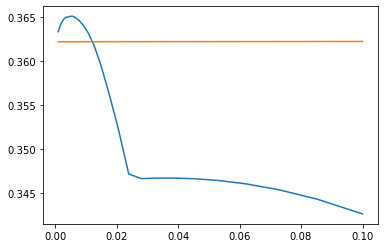

In [13]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score
#dat, target_ = heart.data, heart.target
alphas = np.logspace(-3, -1, 30)

for Model in [Lasso, Ridge]:
    scores = [cross_val_score(Model(alpha), A, B, cv=3).mean()
              for alpha in alphas]
    plt.plot(alphas, scores, label=Model.__name__) 

In [114]:
from sklearn.model_selection import validation_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

degrees = np.arange(1, 21)

#model = make_pipeline(PolynomialFeatures(), LinearRegression())

train_scores, validation_scores = validation_curve(
                 model, x[:, np.newaxis], y,
                 param_name='polynomialfeatures__degree',
                 param_range=degrees)

plt.plot(degrees, validation_scores.mean(axis=1), label='cross-validation')  
plt.plot(degrees, train_scores.mean(axis=1), label='training')  
plt.legend(loc='best')

NameError: name 'model' is not defined

In [36]:
from sklearn.model_selection import cross_val_score
from sklearn import svm
clf_cross = svm.SVC(kernel='rbf', C=0.01, random_state=42, gamma=0.01)
#'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}
scores = cross_val_score(clf_cross, A, B, cv=5)
scores

/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

array([0.66666667, 0.68333333, 0.68333333, 0.68333333, 0.6779661 ])

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

parameters = {'kernel':('rbf', 'linear'), 'C':[0.01, 0.1, 1, 10,100], 'gamma':[0.01, 0.1, 1, 10,100]}
parameters2 = {'kernel':'linear', 'C':[0.01, 0.1, 1, 10,100], 'gamma':[0.01, 0.1, 1, 10,100]}
svc = svm.SVC()
clfff = GridSearchCV(svc, parameters, verbose=2)



#clfff = GridSearchCV(estimator=SVC(),
 #            param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf', 'poly')})
clfff.fit(X_train, Y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.01, gamma=0.01, kernel=rbf ..................................
[CV] ................... C=0.01, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=rbf ..................................
[CV] ................... C=0.01, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=rbf ..................................
[CV] ................... C=0.01, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=rbf ..................................
[CV] ................... C=0.01, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=rbf ..................................
[CV] ................... C=0.01, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=linear ...............................
[CV] ................ C=0.01, gamma=0.01, kernel=linear, total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=linear ...............................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-p

[CV] ................. C=0.01, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=0.01, gamma=0.1, kernel=linear ................................
[CV] ................. C=0.01, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ...................... C=0.01, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ...................... C=0.01, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ...................... C=0.01, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ...................... C=0.01, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ...................... C=0.01, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] .

/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

[CV] ..................... C=0.01, gamma=10, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=10, kernel=rbf ....................................
[CV] ..................... C=0.01, gamma=10, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=10, kernel=rbf ....................................
[CV] ..................... C=0.01, gamma=10, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=10, kernel=linear .................................
[CV] .................. C=0.01, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.01, gamma=10, kernel=linear .................................
[CV] .................. C=0.01, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.01, gamma=10, kernel=linear .................................
[CV] .................. C=0.01, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.01, gamma=10, kernel=linear .................................
[CV] .................. C=0.01, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.01, gamma=10, kernel=linear .................................
[CV] .

/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

[CV] ................. C=0.01, gamma=100, kernel=linear, total=   0.0s
[CV] C=0.01, gamma=100, kernel=linear ................................
[CV] ................. C=0.01, gamma=100, kernel=linear, total=   0.0s
[CV] C=0.01, gamma=100, kernel=linear ................................
[CV] ................. C=0.01, gamma=100, kernel=linear, total=   0.0s
[CV] C=0.01, gamma=100, kernel=linear ................................
[CV] ................. C=0.01, gamma=100, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=0.1, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=0.1, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=0.1, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .

/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

[CV] ................. C=0.1, gamma=0.01, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=linear ................................
[CV] ................. C=0.1, gamma=0.01, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=linear ................................
[CV] ................. C=0.1, gamma=0.01, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=linear ................................
[CV] ................. C=0.1, gamma=0.01, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] .................. C=0.1, gamma=0.1, kernel=linear, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] .................. C=0.1, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] .................. C=0.1, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] .................. C=0.1, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] .................. C=0.1, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C

/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ...................... C=0.1, gamma=10, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ...................... C=0.1, gamma=10, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] .

/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=100, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=100, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=100, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=100, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=100, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=100, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=100, kernel=rbf ....................................
[CV] .

/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

[CV] .................. C=0.1, gamma=100, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=100, kernel=linear .................................
[CV] .................. C=0.1, gamma=100, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=100, kernel=linear .................................
[CV] .................. C=0.1, gamma=100, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] .

/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] .................... C=1, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] .................... C=1, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] .................... C=1, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] .................... C=1, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] .

/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

[CV] ...................... C=1, gamma=1, kernel=linear, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ...................... C=1, gamma=1, kernel=linear, total=   0.0s
[CV] C=1, gamma=10, kernel=rbf .......................................
[CV] ........................ C=1, gamma=10, kernel=rbf, total=   0.0s
[CV] C=1, gamma=10, kernel=rbf .......................................
[CV] ........................ C=1, gamma=10, kernel=rbf, total=   0.1s
[CV] C=1, gamma=10, kernel=rbf .......................................
[CV] ........................ C=1, gamma=10, kernel=rbf, total=   0.1s
[CV] C=1, gamma=10, kernel=rbf .......................................
[CV] ........................ C=1, gamma=10, kernel=rbf, total=   0.0s
[CV] C=1, gamma=10, kernel=rbf .......................................


/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

[CV] ........................ C=1, gamma=10, kernel=rbf, total=   0.0s
[CV] C=1, gamma=10, kernel=linear ....................................
[CV] ..................... C=1, gamma=10, kernel=linear, total=   0.0s
[CV] C=1, gamma=10, kernel=linear ....................................
[CV] ..................... C=1, gamma=10, kernel=linear, total=   0.0s
[CV] C=1, gamma=10, kernel=linear ....................................
[CV] ..................... C=1, gamma=10, kernel=linear, total=   0.0s
[CV] C=1, gamma=10, kernel=linear ....................................
[CV] ..................... C=1, gamma=10, kernel=linear, total=   0.0s
[CV] C=1, gamma=10, kernel=linear ....................................
[CV] ..................... C=1, gamma=10, kernel=linear, total=   0.0s
[CV] C=1, gamma=100, kernel=rbf ......................................
[CV] ....................... C=1, gamma=100, kernel=rbf, total=   0.0s
[CV] C=1, gamma=100, kernel=rbf ......................................
[CV] .

/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

[CV] .................... C=1, gamma=100, kernel=linear, total=   0.0s
[CV] C=1, gamma=100, kernel=linear ...................................
[CV] .................... C=1, gamma=100, kernel=linear, total=   0.0s
[CV] C=1, gamma=100, kernel=linear ...................................
[CV] .................... C=1, gamma=100, kernel=linear, total=   0.0s
[CV] C=1, gamma=100, kernel=linear ...................................
[CV] .................... C=1, gamma=100, kernel=linear, total=   0.0s
[CV] C=1, gamma=100, kernel=linear ...................................
[CV] .................... C=1, gamma=100, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ..................... C=10, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ..................... C=10, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] .

/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ................... C=10, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ................... C=10, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ................... C=10, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ................... C=10, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ................... C=10, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] .

/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

[CV] ..................... C=10, gamma=1, kernel=linear, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ..................... C=10, gamma=1, kernel=linear, total=   0.0s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] ....................... C=10, gamma=10, kernel=rbf, total=   0.0s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] ....................... C=10, gamma=10, kernel=rbf, total=   0.0s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] ....................... C=10, gamma=10, kernel=rbf, total=   0.0s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] ....................... C=10, gamma=10, kernel=rbf, total=   0.0s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] ....................... C=10, gamma=10, kernel=rbf, total=   0.0s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV] .

/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

[CV] .................... C=10, gamma=10, kernel=linear, total=   0.0s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV] .................... C=10, gamma=10, kernel=linear, total=   0.0s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV] .................... C=10, gamma=10, kernel=linear, total=   0.0s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV] .................... C=10, gamma=10, kernel=linear, total=   0.0s
[CV] C=10, gamma=100, kernel=rbf .....................................
[CV] ...................... C=10, gamma=100, kernel=rbf, total=   0.0s
[CV] C=10, gamma=100, kernel=rbf .....................................


/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

[CV] ...................... C=10, gamma=100, kernel=rbf, total=   0.2s
[CV] C=10, gamma=100, kernel=rbf .....................................
[CV] ...................... C=10, gamma=100, kernel=rbf, total=   0.0s
[CV] C=10, gamma=100, kernel=rbf .....................................
[CV] ...................... C=10, gamma=100, kernel=rbf, total=   0.1s
[CV] C=10, gamma=100, kernel=rbf .....................................
[CV] ...................... C=10, gamma=100, kernel=rbf, total=   0.0s
[CV] C=10, gamma=100, kernel=linear ..................................
[CV] ................... C=10, gamma=100, kernel=linear, total=   0.0s
[CV] C=10, gamma=100, kernel=linear ..................................
[CV] ................... C=10, gamma=100, kernel=linear, total=   0.0s
[CV] C=10, gamma=100, kernel=linear ..................................
[CV] ................... C=10, gamma=100, kernel=linear, total=   0.0s
[CV] C=10, gamma=100, kernel=linear ..................................
[CV] .

/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

[CV] ................... C=10, gamma=100, kernel=linear, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=100, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=100, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=100, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=100, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=100, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV] ................. C=100, gamma=0.01, kernel=linear, total=   0.0s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV] .

/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

[CV] ..................... C=100, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=100, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=100, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=100, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV] .................. C=100, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV] .................. C=100, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV] .................. C=100, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV] .

/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

[CV] ...................... C=100, gamma=10, kernel=rbf, total=   0.1s
[CV] C=100, gamma=10, kernel=rbf .....................................
[CV] ...................... C=100, gamma=10, kernel=rbf, total=   0.1s
[CV] C=100, gamma=10, kernel=rbf .....................................
[CV] ...................... C=100, gamma=10, kernel=rbf, total=   0.1s
[CV] C=100, gamma=10, kernel=rbf .....................................


/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ...................... C=100, gamma=10, kernel=rbf, total=   0.1s
[CV] C=100, gamma=10, kernel=linear ..................................
[CV] ................... C=100, gamma=10, kernel=linear, total=   0.0s
[CV] C=100, gamma=10, kernel=linear ..................................
[CV] ................... C=100, gamma=10, kernel=linear, total=   0.0s
[CV] C=100, gamma=10, kernel=linear ..................................
[CV] ................... C=100, gamma=10, kernel=linear, total=   0.0s
[CV] C=100, gamma=10, kernel=linear ..................................
[CV] ................... C=100, gamma=10, kernel=linear, total=   0.0s
[CV] C=100, gamma=10, kernel=linear ..................................
[CV] ................... C=100, gamma=10, kernel=linear, total=   0.0s
[CV] C=100, gamma=100, kernel=rbf ....................................
[CV] ..................... C=100, gamma=100, kernel=rbf, total=   0.1s
[CV] C=100, gamma=100, kernel=rbf ....................................


/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

[CV] ..................... C=100, gamma=100, kernel=rbf, total=   0.1s
[CV] C=100, gamma=100, kernel=rbf ....................................
[CV] ..................... C=100, gamma=100, kernel=rbf, total=   0.1s
[CV] C=100, gamma=100, kernel=rbf ....................................
[CV] ..................... C=100, gamma=100, kernel=rbf, total=   0.1s

/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



[CV] C=100, gamma=100, kernel=rbf ....................................
[CV] ..................... C=100, gamma=100, kernel=rbf, total=   0.1s
[CV] C=100, gamma=100, kernel=linear .................................
[CV] .................. C=100, gamma=100, kernel=linear, total=   0.0s
[CV] C=100, gamma=100, kernel=linear .................................
[CV] .................. C=100, gamma=100, kernel=linear, total=   0.0s
[CV] C=100, gamma=100, kernel=linear .................................
[CV] .................. C=100, gamma=100, kernel=linear, total=   0.0s
[CV] C=100, gamma=100, kernel=linear .................................
[CV] .................. C=100, gamma=100, kernel=linear, total=   0.0s
[CV] C=100, gamma=100, kernel=linear .................................
[CV] .................. C=100, gamma=100, kernel=linear, total=   0.0s


/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [0.01, 0.1, 1, 10, 100],
                         'kernel': ('rbf', 'linear')},
             verbose=2)

In [26]:
clfff.cv_results_
clfff.best_params_

{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}

In [ ]:
scores.shape

In [16]:
#clf_test = svm.SVC(kernel='linear', C=2, random_state=42).fit(X_train, Y_train)
#score_fit = clf_test.score(X_test, Y_test)
#ordonnées1 = scores
#ordonnées2 = np.array(valeurs_valid_score)
#abscisse = np.array([0,1,2,3,4,5,6,7,9,10,11])
#plt.plot(abscisse, ordonnées1)
#plt.plot(abscisse, ordonnées2)
#plt.show()

NameError: name 'valeurs_valid_score' is not defined

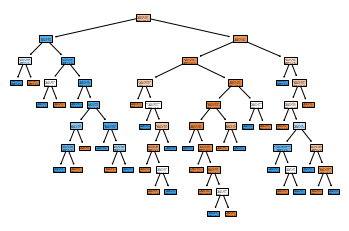

In [17]:
from sklearn import tree
clf_tree = tree.DecisionTreeClassifier()
clf_tree.fit(X_train, Y_train)
tree.plot_tree(clf_tree, filled=True)
with open("heart.dot", 'w') as f:
    f = tree.export_graphviz(clf_tree, out_file=f, filled=True)

In [19]:
from sklearn import svm
clf = sklearn.svm.SVC(kernel='linear', C=2)
clf.fit(X_train,Y_train)
y_predict = clf.predict(X_test)

/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


5.81

Répartissons nos entrainements et nos tests

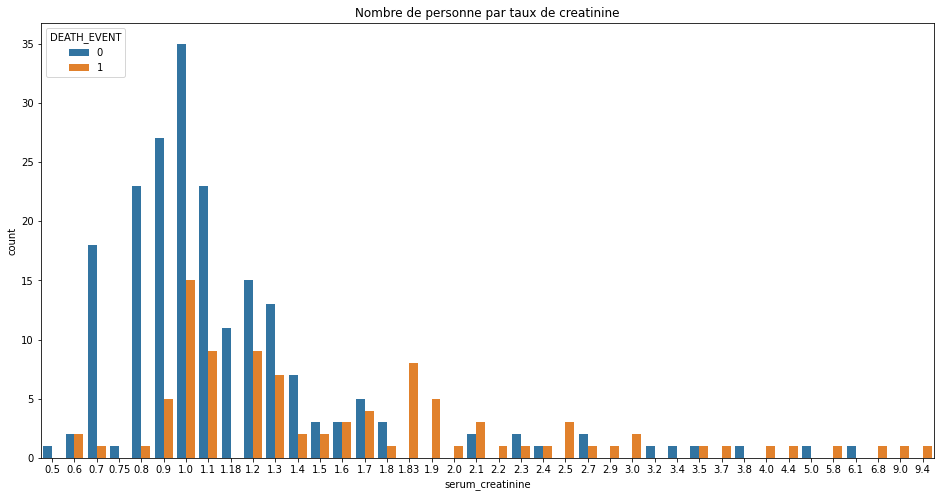

In [25]:
    import seaborn as sns
    plt.figure(figsize=(16,8))
    #plt.style.use(['seaborn-bright','dark_background'])
    #sns.countplot(x = heart[i],data = data, hue = 'class', palette='hsv')
    # count plot on single categorical variable
    sns.countplot(x = 'serum_creatinine',hue ='DEATH_EVENT', data = heart)
    #plt.style.use(['seaborn-bright','dark_background'])
    # Show the plot
    plt.title("Nombre de personne par taux de creatinine")
    plt.show()

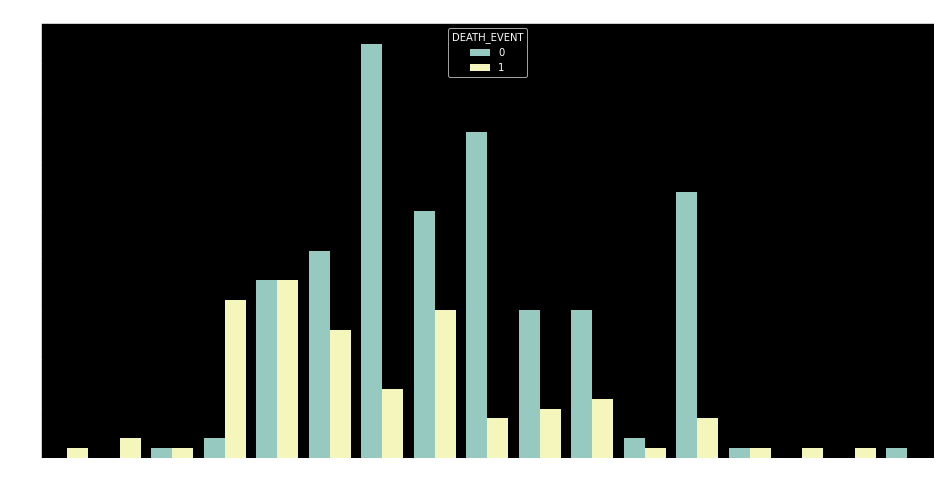

In [26]:
    import seaborn as sns
    plt.figure(figsize=(16,8))
    plt.style.use(['seaborn-bright','dark_background'])
    #sns.countplot(x = heart[i],data = data, hue = 'class', palette='hsv')
    # count plot on single categorical variable
    sns.countplot(x = 'ejection_fraction',hue ='DEATH_EVENT', data = heart)
    #plt.style.use(['seaborn-bright','dark_background'])
    # Show the plot
    plt.title("Nombre de personne par taux d'ejection fraction")
    plt.show()

In [ ]:
print("Les X_train ont maintenant 209 lignes -->", X_train.shape)

On effectue maintenant une SVM

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(y_predict, Y_test)

0.8833333333333333

In [50]:
confmat = sklearn.metrics.confusion_matrix(y_predict, Y_test)
confmat

array([[40,  6],
       [ 1, 13]])

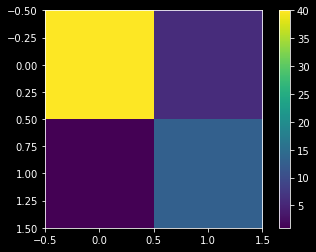

In [51]:
plt.imshow(confmat) ## imshow plutot que contourf, pour ne pas lisser les valeurs.
plt.colorbar() ## pour montrer l'échelle, sur la droite

In [7]:
print("training score:",clf.score(X_train,Y_train))
print("test score:",clf.score(X_test,Y_test))

NameError: name 'clf' is not defined

In [59]:
def load_subSets(X, ratio_train, ratio_valid):
    ratio_test = 1 - ratio_train - ratio_valid #
    assert(ratio_test>0)
    Ntot   = X.shape[0]
    Ntrain = int(ratio_train*Ntot)
    Nvalid = int(ratio_valid*Ntot)
    Ntest  = Ntot - Ntrain - Nvalid
    X_train = A[0: Ntrain].copy()
    y_train = B[0: Ntrain].copy()
    X_valid = A[Ntrain:Ntrain+Nvalid].copy() # X[-Ntest:] est equivalent
    y_valid = B[Ntrain:Ntrain+Nvalid].copy() # X[-Ntest:] est equivalent
    X_test  = A[-Ntest:].copy()
    y_test  = B[-Ntest:].copy()
    return X_train, y_train, X_valid, y_valid, X_test, y_test

In [60]:
ratio_train = 0.6
ratio_valid = 0.3

In [61]:
nComp_range = np.arange(1, A.shape[1])
nComp_range

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [108]:
import sklearn.decomposition
import sklearn.svm
import sklearn.neighbors
import sklearn.datasets

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

linear_training_score = []
linear_valid_score = []

nComp_range = np.arange(1, A.shape[1],2)

#X_train_, y_train_, X_valid_, y_valid_, X_test_, y_test_ = load_subSets(A,ratio_train, ratio_valid)

for nC in nComp_range :
    preProc = sklearn.decomposition.PCA(n_components=nC) ## TODO
    preProc.fit(xtraiin)

    X_train_Transformed = preProc.transform(xtraiin)
    X_valid_Transformed = preProc.transform(xval)
    C_=0.1
    degree_ =3
    kernel_ = 'rbf'
    clf__ = sklearn.svm.SVC(C=C_, kernel=kernel_, degree=degree_)
    clf__.fit(X_train_Transformed, ytraiin)
    trainscore2 = clf__.score(X_train_Transformed, ytraiin) # TODO
    validscore2 = clf__.score(X_valid_Transformed, yval)
    #testscore2 = clf__.score(X_test_Transformed, y_test_)
    print("nombre Composants", nC , "   training score:",trainscore2, ". test score:", testscore2)
    linear_training_score.append(trainscore2)
    linear_valid_score.append(validscore2)

/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

nombre Composants 1    training score: 0.675 . test score: 0.7419354838709677
nombre Composants 3    training score: 0.675 . test score: 0.7419354838709677
nombre Composants 5    training score: 0.675 . test score: 0.7419354838709677
nombre Composants 7    training score: 0.675 . test score: 0.7419354838709677
nombre Composants 9    training score: 0.675 . test score: 0.7419354838709677
nombre Composants 11    training score: 0.675 . test score: 0.7419354838709677


/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [84]:
A.shape[0]/5

59.8

In [28]:
nComp_range = np.arange(1, A.shape[1])
nComp_range

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [102]:
Ntotal = A.shape[0]
ntemp = 240
xval, yval = A[ntemp:Ntotal,:], B[ntemp:Ntotal,:]
xtraiin, ytraiin = A[0:ntemp,:], B[0:ntemp,:]

(0.5, 0.8)

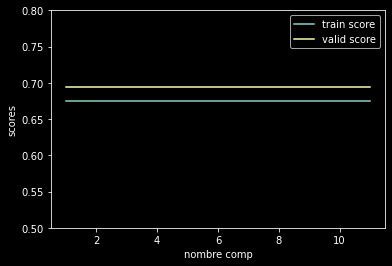

In [109]:
## plot des scores en fonction de l'hyper-param. nc
## c'est cadeau (rien à faire ici)
plt.figure()
plt.plot(nComp_range, linear_training_score, label= "train score")
plt.plot(nComp_range, linear_valid_score   , label= "valid score")
plt.xlabel("nombre comp")
plt.ylabel("scores")
plt.legend()
plt.ylim([0.5,0.8])

In [ ]:
#from sklearn import model_selection
#scores_res = model_selection.cross_val_score(clf, A, B, cv=5)

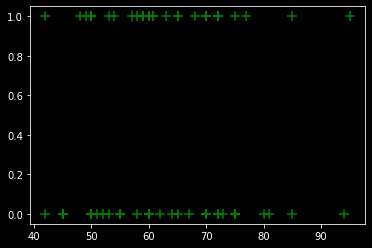

In [76]:
suppVect = clf.support_vectors_ ## TODO : recuperer les vecteurs supports, en utilisant l'objet "clf"
size=100
plt.scatter(suppVect[:,0],suppVect[:,1], c = 'green', s = size, marker='+')
## TODO: tracer aussi les points de l'ensemble de validation (en plus petits, ou autres couleur, etc)

In [ ]:
features2 = ['ejection_fraction', 'serum_creatinine']

target2 = ['DEATH_EVENT'] 

In [ ]:
#Mettre la position
x1_train, y1_train, X1_valid, y1_valid = load_train_et_val(X_train,3)

In [ ]:
x1_train.shape, y1_train.shape, X1_valid.shape, y1_valid.shape, 

In [ ]:
from sklearn import tree

clf_train1 = sklearn.svm.SVC(kernel='linear', C=1)
clf_train1.fit(x1_train,y1_train)
print(clf_train1.score(x1_train,y1_train))

clf_train = tree.DecisionTreeClassifier()

In [ ]:
clf_valid1 = sklearn.svm.SVC(kernel='linear', C=1)
clf_valid1.fit(X1_valid,y1_valid)
print(clf_valid1.score(X1_valid,y1_valid))


In [ ]:
it = 1
while it < 6 :
    x1_train, y1_train, X1_valid, y1_valid = load_train_et_val(X_train,it)
    clf_valid1 = sklearn.svm.SVC(kernel='linear', C=1)
    clf_valid1.fit(X1_valid,y1_valid)
    print(clf_valid1.score(X1_valid,y1_valid))

In [ ]:
X2 = heart.loc[:, features2].values
Y2 = heart.loc[:, target2].values

In [ ]:
X2.shape, Y2.shape

In [ ]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.5, random_state=42)

In [ ]:
clf_2 = sklearn.svm.SVC(kernel='linear', C=1)
clf_2.fit(X2_train,Y2_train)

In [ ]:
print("training score:",clf_2.score(X2_train,Y2_train))
print("test score:",clf_2.score(X2_test,Y2_test))

Passons à la PCA

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
df_std = StandardScaler().fit_transform(A)
df_std.shape

(299, 12)

In [40]:
def f(x):
      return 0.95
    


12


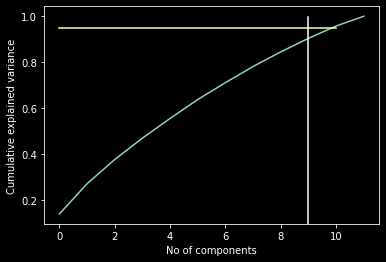

In [113]:
pca = PCA().fit(df_std)
varianceExplained=0.950
plt.plot(np.cumsum(pca.explained_variance_ratio_))
xdata = list(range(12))
ydata = [_*2 for _ in xdata]


plt.axvline(x=9, ymin=0, ymax=0.95)
plt.xlabel("No of components")
preProc = sklearn.decomposition.PCA(n_components=varianceExplained) 
preProc.fit(A)
print(preProc.components_.shape[1])
plt.ylabel("Cumulative explained variance")
plt.plot([f(x) for x in range(11)])
plt.show()

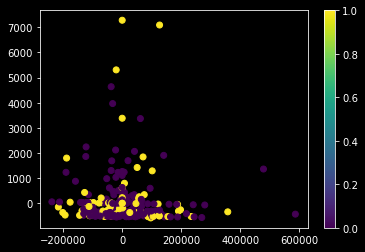

In [47]:
pca = PCA(n_components=2)
proj = pca.fit_transform(A)
plt.scatter(proj[:, 0], proj[:, 1], c=B)
plt.colorbar()

In [ ]:
X_train_Transformed = preProc.transform(X_train)
X_train_Transf_decompressed = preProc.inverse_transform(X_train_Transformed)
diff = X_train_Transf_decompressed - X_train # tableau de taille Nx 64

totalMeanSquaredError = np.mean(diff**2)
print("MSE totale (Mean Squared Error)", totalMeanSquaredError)

In [ ]:
import sklearn.datasets
K,Z= sklearn.datasets.load_digits(n_class=2, return_X_y=True)
D = K.shape[1]
erreurs = np.zeros(D)
for i, nc in enumerate(range(D)): 
    preProc = sklearn.decomposition.PCA(n_components=12, copy=True)
    preProc.fit(X_train) # calcul de la matrice de passage par sklearn
    X_train_Transformed = preProc.transform(X_train)
    X_train_Transf_decompressed = preProc.inverse_transform(X_train_Transformed)

    diff = X_train_Transf_decompressed - X_train # tableau de taille Nx 64
    totalMeanSquaredError = np.mean(diff**2)
    erreurs[i] = totalMeanSquaredError



In [ ]:
plt.plot(np.arange(D), erreurs)
plt.xlabel("n_comp")
plt.ylabel("erreur")



In [45]:
from sklearn.decomposition import PCA

pca_ = PCA().fit(df_std)
varianceExplained=0.950
preProc_ = sklearn.decomposition.PCA(ncomponents=varianceExplained) 
preProc_.fit(heart)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("No of components")
#plt.ylabel(‘Cumulative explained variance’)
plt.show()

TypeError: __init__() got an unexpected keyword argument 'ncomponents'

In [ ]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_train)

X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

from sklearn import svm
classifier = svm.SVC(kernel='linear', gamma=0.01)

# Entraîner la SVM sur le jeu d'entraînement
classifier.fit(X_train_std, Y_train)

Y_test_pred = classifier.decision_function(X_test_std)

# construire la courbe ROC
from sklearn import metrics
fpr, tpr, thr = metrics.roc_curve(Y_test, Y_test_pred)

# calculer l'aire sous la courbe ROC
auc = metrics.auc(fpr, tpr)

# créer une figure
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(6, 6))

# afficher la courbe ROC
plt.plot(fpr, tpr, '-', lw=2, label='gamma=0.01, AUC=%.2f' % auc)

# donner un titre aux axes et au graphique
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('SVM ROC Curve', fontsize=16)

# afficher la légende
plt.legend(loc="lower right", fontsize=14)

# afficher l'image
plt.show()

/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


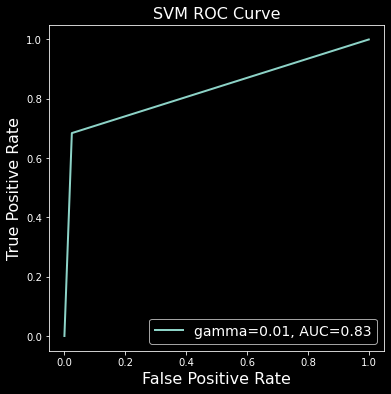

In [35]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_train)

X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

from sklearn import svm
classifier = svm.SVC(kernel='linear', gamma=0.01)

# Entraîner la SVM sur le jeu d'entraînement
classifier.fit(X_train_std, Y_train)

y_test_pred = classifier.decision_function(X_test_std)

# construire la courbe ROC
from sklearn import metrics
fpr, tpr, thr = metrics.roc_curve(Y_test, y_predict)

# calculer l'aire sous la courbe ROC
auc = metrics.auc(fpr, tpr)

# créer une figure
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(6, 6))

# afficher la courbe ROC
plt.plot(fpr, tpr, '-', lw=2, label='gamma=0.01, AUC=%.2f' % auc)

# donner un titre aux axes et au graphique
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('SVM ROC Curve', fontsize=16)

# afficher la légende
plt.legend(loc="lower right", fontsize=14)

# afficher l'image
plt.show()

In [ ]:
dataframe = heart[features]
Pos = np.where(B==1, 0, 1)

In [116]:
df_pos = heart[heart.DEATH_EVENT==1]
df_neg = heart[heart.DEATH_EVENT==0]

features_pos = df_pos[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']]

reste_pos = df_pos[['DEATH_EVENT']]

x_pos = np.asarray(features_pos)

Y_pos = np.asarray(reste_pos)

In [117]:
from sklearn.model_selection import train_test_split
X_train_pos, X_test_pos, Y_train_pos, Y_test_pos = train_test_split(x_pos, Y_pos, test_size=0.2, random_state = 4)

In [118]:
X_train_pos.shape, Y_train_pos.shape

((76, 12), (76, 1))

In [119]:
fpr.shape

(3,)

In [120]:
y_predict

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0])

In [123]:
Y_test[:,0]

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0])

In [124]:
i = 0
nombre_FP = 0
nombre_FN = 0

while i < y_predict.shape[0]:
    i = i+1
    if(y_predict[i-1]!=Y_test[i-1] & Y_test[i-1]==1) :
        nombre_FN = nombre_FN + 1
    if(y_predict[i-1]!=Y_test[i-1] & Y_test[i-1]==0) :
        nombre_FP = nombre_FP + 1

In [125]:
print(nombre_FP)
print(nombre_FN)

1
6


In [ ]:
X.shape[0]

In [ ]:
ordonnées1 = np.array(valeurs_train_score)
ordonnées2 = np.array(valeurs_valid_score)
abscisse = np.array([0,1,2,3,4,5,6,7,9,10,11])
plt.plot(abscisse, ordonnées1)
plt.plot(abscisse, ordonnées2)
plt.show()

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
x = StandardScaler().fit_transform(heart)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

In [28]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [29]:
principalDf

,principal component 1,principal component 2
0,-1.089071,-2.234409
1,0.963466,-1.395716
2,-1.076873,1.230905
3,1.743921,1.138843
4,-1.377911,0.779551
...,...,...
294,2.666231,-2.306278
295,1.948577,0.609316
296,-1.622585,1.333132
297,1.581532,-0.975352
